 # K-Means Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('invest_prep_logist.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0,0,57,1,1,1,1,0,1,0,...,0,0,0,1,1,2,0,1,0,0
1,1,0,40,0,1,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,2,0,35,1,1,0,0,1,0,0,...,0,1,0,1,0,2,2,0,0,0
3,2,1,19,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,3,0,61,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,1,16,1,0,0,0,1,1,0,...,0,0,0,1,1,1,0,1,0,0
6,0,0,40,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
7,1,0,27,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8,3,1,35,0,1,0,1,0,0,0,...,1,1,0,1,1,2,2,1,1,1
9,4,0,72,1,0,1,0,2,0,0,...,0,0,0,0,0,2,4,0,0,1


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['country','is_urban','age','female','married','religion','can_calc_percents','employment_type_last_year','income_government_last_year','income_own_business_last_year','num_times_borrowed_last_year','active_bank_user','cash_property_savings','has_insurance','can_call','can_make_transaction','phone_ownership','num_financial_activities_last_year','literacy','has_investment','formal_savings (Y)']).round()

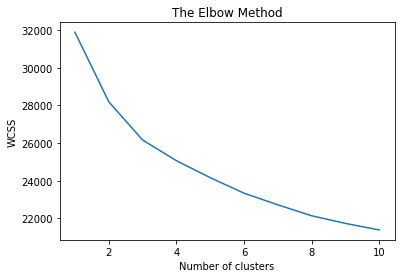

In [4]:

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

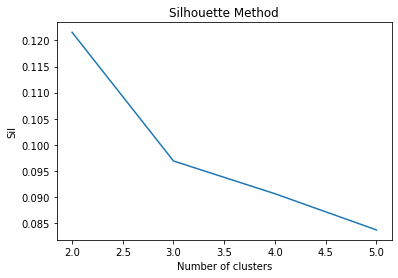

2:0.12157231419625136
3:0.09689624667493844
4:0.0906206536062008
5:0.08368587940601173


In [5]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

По данному методу целесообразно выделить 2 кластера

In [6]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['country','is_urban','age','female','married','religion','can_calc_percents','employment_type_last_year','income_government_last_year','income_own_business_last_year','num_times_borrowed_last_year','active_bank_user','cash_property_savings','has_insurance','can_call','can_make_transaction','phone_ownership','num_financial_activities_last_year','literacy','has_investment','formal_savings (Y)']).round(2)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0.91,0.46,0.13,0.55,0.51,0.01,0.49,0.23,0.06,0.54,...,0.24,0.55,0.26,0.95,0.78,0.89,0.19,0.85,0.57,0.66
1,0.41,0.18,0.32,0.77,0.67,0.01,0.28,0.32,0.04,0.17,...,0.05,0.35,0.05,0.46,0.05,0.18,0.00,0.26,0.15,0.06
2,0.06,0.38,0.15,0.34,0.73,0.01,0.44,0.16,0.06,0.24,...,0.33,0.28,0.10,0.90,0.14,0.91,0.01,0.77,0.25,0.28


In [7]:
# Fitting K-Means to the dataset
km1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms1 = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms1.cluster_centers_, columns = ['country','is_urban','age','female','married','religion','can_calc_percents','employment_type_last_year','income_government_last_year','income_own_business_last_year','num_times_borrowed_last_year','active_bank_user','cash_property_savings','has_insurance','can_call','can_make_transaction','phone_ownership','num_financial_activities_last_year','literacy','has_investment','formal_savings (Y)']).round(2)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0.62,0.48,0.14,0.44,0.56,0.01,0.52,0.18,0.07,0.49,...,0.36,0.48,0.23,0.94,0.62,0.92,0.14,0.88,0.53,0.63
1,0.28,0.23,0.26,0.63,0.71,0.01,0.32,0.27,0.04,0.17,...,0.11,0.31,0.06,0.63,0.06,0.45,0.00,0.43,0.15,0.09


In [8]:
X_var = df.iloc[:, [0,1,2,3,4,6,9,11,12,14,15,16,18,19,20 ]]

In [9]:
# Fitting K-Means to the dataset
km2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X_var)
kms2 = KMeans(n_clusters = 3, random_state = 0).fit(X_var)
pd.DataFrame(kms2.cluster_centers_, columns = ['country','is_urban','age','female','married','can_calc_percents','income_own_business_last_year','active_bank_user','cash_property_savings','can_call','can_make_transaction','phone_ownership','literacy','has_investment','formal_savings (Y)']).round(4)

,country,is_urban,age,female,married,can_calc_percents,income_own_business_last_year,active_bank_user,cash_property_savings,can_call,can_make_transaction,phone_ownership,literacy,has_investment,formal_savings (Y)
0,0.4005,0.1823,0.3272,0.7705,0.6751,0.2767,0.1673,0.0542,0.3523,0.4557,0.0512,0.1693,0.2620,0.1506,0.0666
1,0.0718,0.3697,0.1563,0.3356,0.7307,0.4454,0.2323,0.3259,0.2755,0.9016,0.1290,0.9181,0.7664,0.2381,0.2736
2,0.9023,0.4719,0.1273,0.5598,0.5066,0.4938,0.5504,0.2465,0.5517,0.9507,0.7801,0.8860,0.8474,0.5795,0.6502


In [10]:
# Less features
X = df.iloc[:, [0, 9, 15, 16, 18, 19, 20]]

In [11]:
# Fitting K-Means to the dataset
km3 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms3 = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms3.cluster_centers_, columns = ['country','income_own_business_last_year','can_make_transaction','phone_ownership','literacy','has_investment','formal_savings (Y)']).round(4)

,country,income_own_business_last_year,can_make_transaction,phone_ownership,literacy,has_investment,formal_savings (Y)
0,0.7345,0.6026,0.6689,0.9241,0.8745,0.6317,0.6491
1,0.2601,0.1432,0.0866,0.5004,0.4754,0.1350,0.1303


In [12]:
# Fitting K-Means to the dataset
km4 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms4 = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms4.cluster_centers_, columns = ['country','income_own_business_last_year','can_make_transaction','phone_ownership','literacy','has_investment','formal_savings (Y)']).round(4)

,country,income_own_business_last_year,can_make_transaction,phone_ownership,literacy,has_investment,formal_savings (Y)
0,0.5437,0.1717,0.0858,0.1213,0.1496,0.1525,0.0712
1,0.0408,0.1703,0.1188,0.8105,0.7523,0.1770,0.2058
2,0.8551,0.6100,0.7177,0.9117,0.8539,0.6339,0.6814


In [13]:
# Importing hc clusters
import pickle
input = open('clust-hc.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [14]:

# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.5414235585895202

In [15]:
# Importing hc clusters
import pickle
input = open('clust-hc1.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc1 = obj["hc1"]

In [16]:

# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc1,km1)

0.39796126440434465

In [17]:
# Importing hc clusters
import pickle
input = open('clust-hc2.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc2 = obj["hc2"]

In [18]:

# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc2,km2)

0.2913897207087003

In [19]:
# Importing hc clusters
import pickle
input = open('clust-hc3.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc3 = obj["hc3"]

In [20]:

# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc3,km3)

0.38994526760085696

In [21]:
# Importing hc clusters
import pickle
input = open('clust-hc4.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc4 = obj["hc4"]

In [22]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc4,km4)

0.22778442521748848

In [23]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [24]:
# Export km clusters
import pickle
obj = {'km1': km1}
output = open('clust-km1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [25]:
# Export km clusters
import pickle
obj = {'km2': km2}
output = open('clust-km2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [26]:
# Export km clusters
import pickle
obj = {'km3': km3}
output = open('clust-km3.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [27]:
# Export km clusters
import pickle
obj = {'km4': km4}
output = open('clust-km4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Таким образом, проведен ряд экспериментов. В исходной модели были выявлены вариативные переменные. Но в результате максимальный % пересечения результатов кластеризации получен для модели разбиения на 3 кластера, на всем переменных - 54%. Как раз в поставленных задачах кластеризации было оптимальным найти разбиение, где выделенно 3 класса. Однако, в данной модели есть маловариативные переменные, которые были исклюечены при построении модели №3. Результат данного пересечения -29%, значительно хуже. Но, данное разбиение интересно с точки зрения интерпретации и содержит в себе вариативные ядра кластеров. Модель разбиения на 3 кластера при всех наиболее влиятельных переменных менее интересна для дальнейшей работы, поскольку содержит в себе меньшее число метрик, а поэтому и шанс выявить бедность человека меньший. Тем более результат пересечения в данной модели худший среди всех - 23%.